In [ ]:
!pip install mpld3
!pip install bokeh
!pip install numpy

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import math
from mpl_toolkits.mplot3d import Axes3D
from datetime import datetime

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/simula/driving_test.csv') #.sort_values(by=['Time', 'distance'], ascending=[True, False])
#df.index[df['scenario'] == 'OD'].to_list()
df['scenario'].value_counts()

OD    980
Name: scenario, dtype: int64

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/simula/driving_test.csv', nrows=50) #.sort_values(by=['Time', 'distance'], ascending=[True, False])
df[['Time', 'RSRP', 'distance']]

**Distance over Time (Max. RSRP Highlighted)**

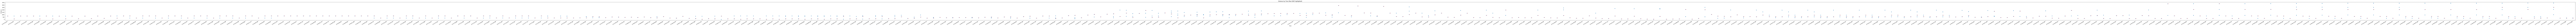

In [ ]:
### Distance over Time (Max RSRP Highlighted)

%matplotlib inline
df = pd.read_csv('/content/drive/MyDrive/simula/driving_test.csv') #, nrows=50) #.sort_values(by=['Time', 'distance'], ascending=[True, False])

RSRP_by_time = []
for i in sorted(set(df['Time'])):
  l = []
  for j in df.index[df['Time'] == i].to_list():
    l.append([j, df.iloc[j]['Time'],  df.iloc[j]['RSRP'], df.iloc[j]['distance']])
  RSRP_by_time.append(max(l, key=lambda item:item[2]))
#print(RSRP_by_time)

plt.scatter(df['Time'], df['distance'], s=20, color='black')
plt.scatter([i[1] for i in RSRP_by_time], [i[3] for i in RSRP_by_time], s=60, marker=1, color='red')

N = len(set(df['Time']))
plt.gca().margins(x=0.001)
plt.gcf().canvas.draw()
tl = plt.gca().get_xticklabels()
maxsize = max([t.get_window_extent().width for t in tl])
m = 2.2 # inch margin
s = maxsize/plt.gcf().dpi*N+2*m
margin = m/plt.gcf().get_size_inches()[0]

#plt.gcf().subplots_adjust(left=margin, right=1.-margin)
plt.gcf().set_size_inches(s, plt.gcf().get_size_inches()[1])

plt.title('Distance by Time (Max RSRP Highlighted)')
plt.xlabel('Time')
plt.ylabel('Distance')

plt.gcf().autofmt_xdate()
plt.tight_layout()
plt.savefig('distance_by_time_highlighted_max_RSRP.png')

**RSRP over Time (Min. Distance Highlighted)**

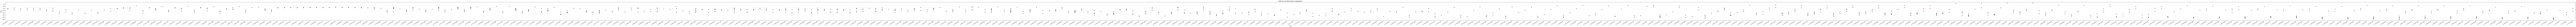

In [ ]:
### RSRP over Time (Min Distance Highlighted)

%matplotlib inline
df = pd.read_csv('/content/drive/MyDrive/simula/driving_test.csv') #, nrows=50) #.sort_values(by=['Time', 'distance'], ascending=[True, False])

# gether the data
RSRP_by_time = []
for i in sorted(set(df['Time'])):
  l = []
  for j in df.index[df['Time'] == i].to_list():
    l.append([j, df.iloc[j]['Time'],  df.iloc[j]['distance'], df.iloc[j]['RSRP']])
  min_list = min(l, key=lambda item:item[2])
  if len(df.index[df['distance'] == min_list[2]].to_list()) == 1 and len(l) != 1:
    RSRP_by_time.append(min_list)

  """
  for tup in l:
    if tup[2] == min_list[2]:
      RSRP_by_time.append(tup)
  """
#print(RSRP_by_time)

# scatter
plt.scatter(df['Time'], df['RSRP'], s=20, color='black')
plt.scatter([i[1] for i in RSRP_by_time], [i[3] for i in RSRP_by_time], s=70, marker=1, color='red')

N = len(set(df['Time']))
plt.gca().margins(x=0.001)
plt.gcf().canvas.draw()
tl = plt.gca().get_xticklabels()
maxsize = max([t.get_window_extent().width for t in tl])
m = 2.2 # inch margin
s = maxsize/plt.gcf().dpi*N+2*m
margin = m/plt.gcf().get_size_inches()[0]

#plt.gcf().subplots_adjust(left=margin, right=1.-margin)
plt.gcf().set_size_inches(s, plt.gcf().get_size_inches()[1])

plt.title('RSRP by Time (Min Distance Highlighted)')
plt.xlabel('Time')
plt.ylabel('RSRP')

plt.gcf().autofmt_xdate()
plt.tight_layout()
plt.savefig('RSRP_by_time_highlighted_min_distance.png')

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/simula/driving_data.csv') #, nrows=11328) #.sort_values(by=['Time', 'distance'], ascending=[True, False])
df.loc[df['campaign_tag'] == '14_30_45_17_02_2021']['campaign'][6902]


'Ping_UNIDATA_4G5G_Vodafone_Driving_Luca'

In [ ]:
df.loc[df['campaign_tag'] == '21_03_32_16_02_2021']

,Unnamed: 0,Date,Time,UTC,Latitude,Longitude,Altitude,Speed,Heading,#Sat,EARFCN,Frequency,PCI,MCC,MNC,TAC,CellIdentity,eNodeB.ID,cellID,BW,SymPerSlot,Power,SINR,RSRP,RSRQ,4G-Drift,Sigma-4G-Drift,TimeOfArrival,TimeOfArrivalFN,LTE-M,5G NR,eNodeB Tx Ports,SIB2 eMBMS/DSS,MIB dl_Bandwidth(MHz),name,campaign,campaign_tag,scenario,cellLongitude,cellLatitude,cellPosErrorLambda1,cellPosErrorLambda2,n_CellIdentities,distance
64282,121008,11.01.2021,17:25:18.529,1613060719,41.824213,12.465250,37.82,0.04,205.20,8,1225,1807.5,178,222.0,"""Op""[1]",27721.0,77240667,301721,91.0,NaN,7,-65.89,12.19,-89.77,-16.53,-3.46,1139.88,0.005982,541017.0,no,no,2.0,NaN,5.0,Interactivity_gaming_4G5G_TIM_Driving_Viale_Ma...,Interactivity_gaming_4G5G_TIM_Driving_Viale_Ma...,21_03_32_16_02_2021,OD,12.467476,41.830427,0.195134,0.152498,9,715.959632
64283,131300,11.01.2021,17:25:18.529,1613060719,41.824213,12.465250,37.82,0.04,205.20,8,1225,1807.5,177,222.0,"""Op""[1]",27721.0,77240668,301721,92.0,NaN,7,-65.22,8.16,-92.15,-18.91,-6.16,1139.88,0.005982,541017.0,no,no,2.0,NaN,5.0,Interactivity_gaming_4G5G_TIM_Driving_Viale_Ma...,Interactivity_gaming_4G5G_TIM_Driving_Viale_Ma...,21_03_32_16_02_2021,OD,12.467476,41.830427,0.195134,0.152498,9,715.959632
64284,261059,11.01.2021,17:25:23.055,1613060723,41.824216,12.465249,37.77,0.04,205.20,8,1350,1820.0,189,NaN,"""Op""[1]",NaN,77240584,301721,NaN,NaN,7,-75.56,-9.01,-96.47,-22.42,-2.03,788.68,0.005983,541468.0,---,---,NaN,NaN,NaN,Interactivity_gaming_4G5G_TIM_Driving_Viale_Ma...,Interactivity_gaming_4G5G_TIM_Driving_Viale_Ma...,21_03_32_16_02_2021,OD,12.467476,41.830427,0.249508,0.203755,9,715.658382
64285,271064,11.01.2021,17:25:23.055,1613060723,41.824216,12.465249,37.77,0.04,205.20,8,1350,1820.0,14,222.0,"""Op""[1]",3131.0,76811012,300043,4.0,NaN,7,-66.23,5.29,-88.04,-13.99,6.41,788.37,0.005982,541468.0,no,yes,2.0,NaN,20.0,Interactivity_gaming_4G5G_TIM_Driving_Viale_Ma...,Interactivity_gaming_4G5G_TIM_Driving_Viale_Ma...,21_03_32_16_02_2021,OD,12.463813,41.824584,0.693125,0.332069,3,125.969654
64286,301002,11.01.2021,17:25:23.722,1613060723,41.824216,12.465249,37.77,0.04,205.20,8,1225,1807.5,178,222.0,"""Op""[1]",27721.0,77240667,301721,91.0,NaN,7,-67.45,11.68,-91.27,-14.76,-0.08,622.18,0.005983,541535.0,no,no,2.0,NaN,5.0,Interactivity_gaming_4G5G_TIM_Driving_Viale_Ma...,Interactivity_gaming_4G5G_TIM_Driving_Viale_Ma...,21_03_32_16_02_2021,OD,12.467476,41.830427,0.195134,0.152498,9,715.658382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66437,642826,11.01.2021,17:37:21.886,1613061434,41.864576,12.468692,26.22,35.64,288.29,6,1350,1820.0,338,222.0,"""Op""[1]",3129.0,77367812,302218,4.0,NaN,7,-100.80,-17.31,-118.51,-27.99,45.20,324.06,NaN,NaN,no,yes,2.0,NaN,20.0,Interactivity_gaming_4G5G_TIM_Driving_Viale_Ma...,Interactivity_gaming_4G5G_TIM_Driving_Viale_Ma...,21_03_32_16_02_2021,OD,12.472239,41.863402,28.000004,28.000004,5,321.790787
66438,643524,11.01.2021,17:37:23.986,1613061434,41.864576,12.468692,26.22,35.64,288.29,6,6300,806.0,392,222.0,"""Op""[1]",3165.0,76814340,300056,4.0,NaN,7,-68.08,13.50,-90.55,-14.63,-8.07,886.65,0.006620,613563.0,no,no,2.0,NaN,10.0,Interactivity_gaming_4G5G_TIM_Driving_Viale_Ma...,Interactivity_gaming_4G5G_TIM_Driving_Viale_Ma...,21_03_32_16_02_2021,OD,12.465303,41.865077,0.199378,0.135878,9,286.436843
66439,643624,11.01.2021,17:37:23.986,1613061434,41.864576,12.468692,26.22,35.64,288.29,6,6300,806.0,433,222.0,"""Op""[1]",3129.0,77367809,302218,1.0,NaN,7,-84.03,-16.39,-103.26,-27.21,11.23,319.04,NaN,NaN,no,yes,2.0,NaN,10.0,Interactivity_gaming_4G5G_TIM_Driving_Viale_Ma...,Interactivity_gaming_4G5G_TIM_Driving_Viale_Ma...,21_03_32_16_02_2021,OD,12.472239,41.863402,13.635001,13.635001,5,321.790787
66440,644023,11.01.2021,17:37:25.386,1613061434,41.864576,12.468692,26.22,35.64,288.29,6,3025,2647.5,488,222.0,"""Op""[2]",32087.0,17682741,69073,53.0,NaN,7,-83.15

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/simula/driving_data.csv') #, nrows=11328) #.sort_values(by=['Time', 'distance'], ascending=[True, False])

#print(df['campaign'].nunique())
#print(df['campaign_tag'].nunique())
#df['campaign'].value_counts()
df.loc[df['campaign_tag'] == '14_42_36_17_02_2021'].head(10)
df.loc[df['campaign_tag'] == '14_39_16_17_02_2021'].head(10)

In [ ]:
### Plot routes

df = pd.read_csv('/content/drive/MyDrive/simula/driving_data.csv') #nrows=11328) #.sort_values(by=['Time', 'distance'], ascending=[True, False])
print(df.shape)

set_campaigns = df['campaign_tag'].unique()
n_cmp = len(set_campaigns)
print(n_cmp,': # of unique campaigns')
#print(set_campaigns)

layout_n_x = math.floor(math.sqrt(n_cmp))
layout_n_y = math.ceil(n_cmp / layout_n_x)
#print(layout_n_x, layout_n_y)

us = 10 #size unit
plt.gcf().set_size_inches(us * layout_n_y, us * layout_n_y)

for i in range(n_cmp):
  campaign_tag = set_campaigns[i]
  sub_df = df.loc[df['campaign_tag'] == campaign_tag]
  lat = sub_df['Latitude']
  lon = sub_df['Longitude']
  sp = plt.subplot(layout_n_x, layout_n_y, i+1)
  sp.set_title(str(campaign_tag + '\n' + df.loc[df['campaign_tag'] == campaign_tag, 'campaign'].to_list()[0]))
  sp.set_xlabel('Latitude')
  sp.set_ylabel('Longitude')
  c = cm.rainbow(np.linspace(0, 1, len(lat)))
  plt.scatter(lat, lon, color=c)

(88585, 44)
2
[[41.823736, -81.3], [41.823743, -79.57], [41.823745, -81.62], [41.823746, -80.48], [41.823747, -81.74], [41.823747999999995, -80.28], [41.82375, -86.95], [41.823752, -81.13], [41.823753, -82.23], [41.823754, -78.63], [41.823755, -73.3], [41.823756, -81.28], [41.823757, -81.36], [41.823758000000005, -82.86], [41.823759, -81.34], [41.82376, -81.54], [41.823761, -81.56], [41.823762, -79.78], [41.823763, -79.0], [41.823764000000004, -79.21], [41.823765, -80.47], [41.823767, -90.42], [41.823768, -82.11], [41.823772, -78.04], [41.823772999999996, -79.85], [41.823774, -80.27], [41.823775, -74.95], [41.823776, -78.45], [41.823777, -78.6], [41.823778000000004, -88.0], [41.823778999999995, -80.13], [41.82378, -79.94], [41.823781, -79.4], [41.823782, -84.46], [41.823784, -79.48], [41.823785, -78.51], [41.823791, -82.74], [41.823792, -77.46], [41.823793, -86.03], [41.823796, -78.22], [41.8238, -78.77], [41.823815, -82.0], [41.823817, -78.69], [41.82382, -85.89], [41.823821, -78.59],

IndexError: ignored

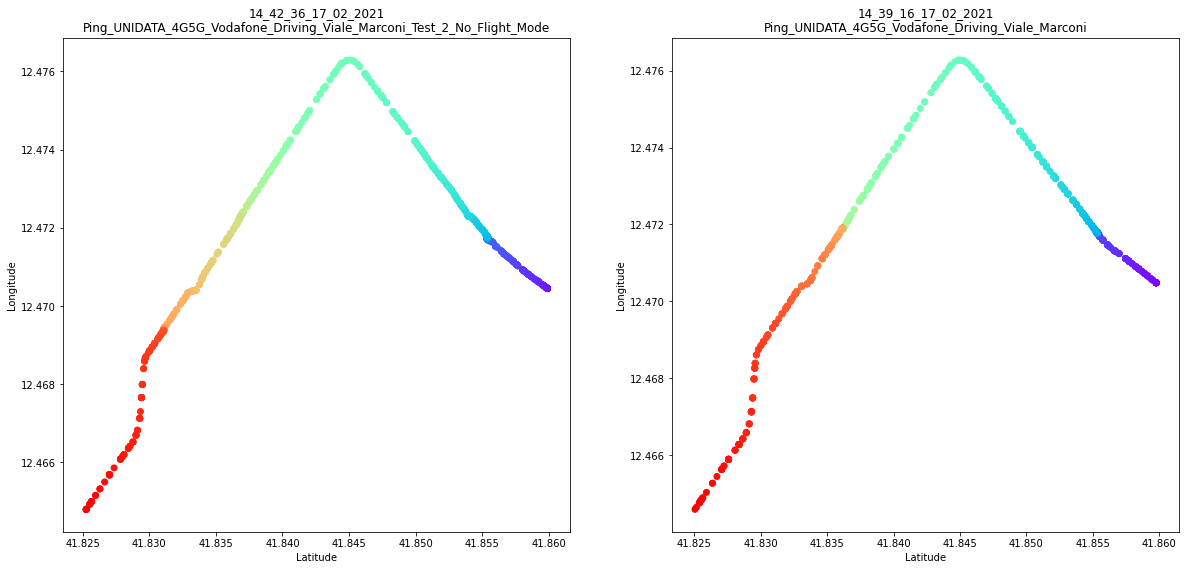

In [ ]:
### Plot specific

df = pd.read_csv('/content/drive/MyDrive/simula/driving_data.csv') #nrows=11328) #.sort_values(by=['Time', 'distance'], ascending=[True, False])
print(df.shape)

set_campaigns = ['14_42_36_17_02_2021', '14_39_16_17_02_2021']
n_cmp = len(set_campaigns)
print(n_cmp)
#print(set_campaigns)

#for i in set_campaigns:
  #df.loc[df['campaign_tag'] == i].info()
  #print(df.loc[df['campaign_tag'] == i].shape)

#df.loc[(df['campaign_tag'] == '14_42_36_17_02_2021') & (df['Latitude'] < 41.86) & (df['Latitude'] > 41.825)]

layout_n_x = math.floor(math.sqrt(n_cmp))
layout_n_y = math.ceil(n_cmp / layout_n_x)
#print(layout_n_x, layout_n_y)

us = 10 #size unit
#plt.gcf().set_size_inches(us * layout_n_y, us * layout_n_x)
plt.gcf().set_size_inches(20, 20) #us * layout_n_y, us * layout_n_x)

RSRP_by_time = []
for i in sorted(set(df['Latitude'])):
  l = []
  for j in df.index[df['Latitude'] == i].to_list():
    l.append([df.iloc[j]['Latitude'],  df.iloc[j]['RSRP']])
  RSRP_by_time.append(max(l, key=lambda item:item[1]))
print(RSRP_by_time)

for i in range(n_cmp):
  campaign_tag = set_campaigns[i]
  #sub_df = df.loc[df['campaign_tag'] == campaign_tag]
  sub_df = df.loc[(df['campaign_tag'] == campaign_tag) & (df['Latitude'] < 41.86) & (df['Latitude'] > 41.825)]
  lat = sub_df['Latitude']
  lon = sub_df['Longitude']
  rsrp = sub_df['RSRP']
  
  #sp = plt.subplot(layout_n_x, layout_n_y, i+1)

  # plot trajectory
  sp1 = plt.subplot(2, 2, i+3)
  sp1.set_title(str(campaign_tag + '\n' + df.loc[df['campaign_tag'] == campaign_tag, 'campaign'].to_list()[0]))
  sp1.set_xlabel('Latitude')
  sp1.set_ylabel('Longitude')
  c = cm.rainbow(np.linspace(0, 1, len(lat)))
  plt.scatter(lat, lon, color=c)

for i in range(n_cmp):
  campaign_tag = set_campaigns[i]
  #sub_df = df.loc[df['campaign_tag'] == campaign_tag]
  sub_df = df.loc[(df['campaign_tag'] == campaign_tag) & (df['Latitude'] < 41.86) & (df['Latitude'] > 41.825)]
  lat = sub_df['Latitude']
  lon = sub_df['Longitude']
  rsrp = sub_df['RSRP']
  #sp = plt.subplot(layout_n_x, layout_n_y, i+1)

  RSRP_by_time = []
  for i in sorted(set(sub_df['Latitude'])):
    l = []
    for j in sub_df.index[sub_df['Latitude'] == i].to_list():
      l.append([sub_df.iloc[j]['Latitude'],  sub_df.iloc[j]['RSRP']])
    RSRP_by_time.append(max(l, key=lambda item:item[1]))
  print(RSRP_by_time)

  # plot RSRP
  sp2 = plt.subplot(2, 2, i+1)
  plt.plot([i[0] for i in RSRP_by_time], [i[1] for i in RSRP_by_time])

In [ ]:
### BOKEH

import bokeh.io
from bokeh.plotting import figure, show

bokeh.io.output_notebook()

df = pd.read_csv('/content/drive/MyDrive/simula/driving_data.csv', nrows=11328) #.sort_values(by=['Time', 'distance'], ascending=[True, False])
print(df.shape)

p.circle(df['Latitude'], df['Longitude'], size=10, color="navy", alpha=0.5)
show(p)

"""
# prepare some data
x = [1, 2, 3, 4, 5]
y = [6, 7, 2, 4, 5]

# create a new plot with a title and axis labels
p = figure(title="Simple line example", x_axis_label="x", y_axis_label="y")

# add a line renderer with legend and line thickness
p.line(x, y, legend_label="Temp.", line_width=2)

# show the results
show(p)
"""

**10.11.2021**

In [ ]:
### Handovers based on RSRP

%matplotlib inline
df = pd.read_csv('/content/drive/MyDrive/simula/driving_test.csv') #.sort_values(by=['Time', 'distance'], ascending=[True, False])
df['CellIdentity'] = df['CellIdentity'].astype('str')

# gether the data
cell_by_time = []
for i in sorted(set(df['Time'])):
  l = []
  for j in df.index[df['Time'] == i].to_list():
    l.append([j, df.iloc[j]['Time'],  df.iloc[j]['CellIdentity'], df.iloc[j]['RSRP']])
  min_list = max(l, key=lambda item:item[3])
  cell_by_time.append(min_list)

# grid
plt.grid(axis = 'y', linestyle='--', linewidth=0.3)

# plot
plt.scatter(df['Time'], df['CellIdentity'], color='r') #, s=70, marker=1, color='red')
plt.plot([i[1] for i in cell_by_time], [i[2] for i in cell_by_time])

N = len(set(df['Time']))
plt.gca().margins(x=0.001, y=0.02)
plt.gcf().canvas.draw()
tl = plt.gca().get_xticklabels()
maxsize = max([t.get_window_extent().width for t in tl])
m = 0.6 # inch margin
s = maxsize/plt.gcf().dpi*N+2*m
margin = m/plt.gcf().get_size_inches()[0]

len_set_x = len(set([i[1] for i in cell_by_time]))
len_set_y = len(set([i[2] for i in cell_by_time]))

plt.title('Handovers based on RSRP')
plt.xlabel('Time')
plt.ylabel('Cells')
plt.gcf().autofmt_xdate()
plt.gcf().set_size_inches(len_set_x * 0.4, len_set_y * 0.3)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.tight_layout()
plt.savefig('Handovers based on RSRP.png')

   Unnamed: 0  ...                                           location
0      121008  ...  0      41.824213\n1      41.824213\n2      41....
1      131300  ...  0      41.824213\n1      41.824213\n2      41....
2      261059  ...  0      41.824213\n1      41.824213\n2      41....
3      271064  ...  0      41.824213\n1      41.824213\n2      41....
4      301002  ...  0      41.824213\n1      41.824213\n2      41....

[5 rows x 45 columns]


KeyboardInterrupt: ignored

In [ ]:
### Handovers based on RSRP 2

%matplotlib inline
df = pd.read_csv('/content/drive/MyDrive/simula/driving_test.csv') #.sort_values(by=['Time', 'distance'], ascending=[True, False])
df['CellIdentity'] = df['CellIdentity'].astype('str')

# gether the data
cell_by_time = []
for i in sorted(set(df['Time'])):
  l = []
  prev = None
  for j in df.index[df['Time'] == i].to_list():
    l.append([j, df.iloc[j]['Time'],  df.iloc[j]['CellIdentity'], df.iloc[j]['RSRP']])
  if prev[3] 
  min_list = max(l, key=lambda item:item[3])
  cell_by_time.append(min_list)

# grid
plt.grid(axis = 'y', linestyle='--', linewidth=0.3)

# plot
plt.scatter(df['Time'], df['CellIdentity'], color='r') #, s=70, marker=1, color='red')
plt.plot([i[1] for i in cell_by_time], [i[2] for i in cell_by_time])

N = len(set(df['Time']))
plt.gca().margins(x=0.001, y=0.02)
plt.gcf().canvas.draw()
tl = plt.gca().get_xticklabels()
maxsize = max([t.get_window_extent().width for t in tl])
m = 0.6 # inch margin
s = maxsize/plt.gcf().dpi*N+2*m
margin = m/plt.gcf().get_size_inches()[0]

len_set_x = len(set([i[1] for i in cell_by_time]))
len_set_y = len(set([i[2] for i in cell_by_time]))

plt.title('Handovers based on RSRP')
plt.xlabel('Time')
plt.ylabel('Cells')
plt.gcf().autofmt_xdate()
plt.gcf().set_size_inches(len_set_x * 0.4, len_set_y * 0.3)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.tight_layout()
plt.savefig('Handovers based on RSRP.png')

16.11.2021

In [ ]:
%matplotlib inline
df = pd.read_csv('/content/drive/MyDrive/simula/driving_test.csv') #.sort_values(by=['Time', 'distance'], ascending=[True, False])
df['CellIdentity'] = df['CellIdentity'].astype('str')

df['Latitude'] = df['Latitude'].astype('float').round(decimals=7).astype('str')
df['Longitude'] = df['Longitude'].astype('float').round(decimals=7).astype('str')


df['location'] = df['Latitude'] + '_' + df['Longitude']
#print(df['location'].head(200))

df['location'].nunique()
#df['Longitude'].nunique()
#df['Latitude'].nunique()

In [ ]:
%matplotlib inline
df = pd.read_csv('/content/drive/MyDrive/simula/driving_test.csv') #.sort_values(by=['Time', 'distance'], ascending=[True, False])
df['CellIdentity'] = df['CellIdentity'].astype('str')

prev = [0.0, 0.0]
location = []
for index, row in df.iterrows():
  distance = math.sqrt((row['Latitude'] - prev[0]) ** 2 + (row['Longitude'] - prev[1]) ** 2) * 111
  if distance < 0.01:
    location.append(str(round(prev[0], 6)) + '_' + str(round(prev[1], 6)))
  else:
    prev = [row['Latitude'], row['Longitude']]
    location.append(str(round(row['Latitude'], 6)) + '_' + str(round(row['Longitude'], 6)))
  
  print(row['Latitude'], row['Longitude'])
  print(location[-1])
  print(distance*1000)
  print('\n')
  
  if len(location) > 100:
    break

#print(df['location'].head(200))

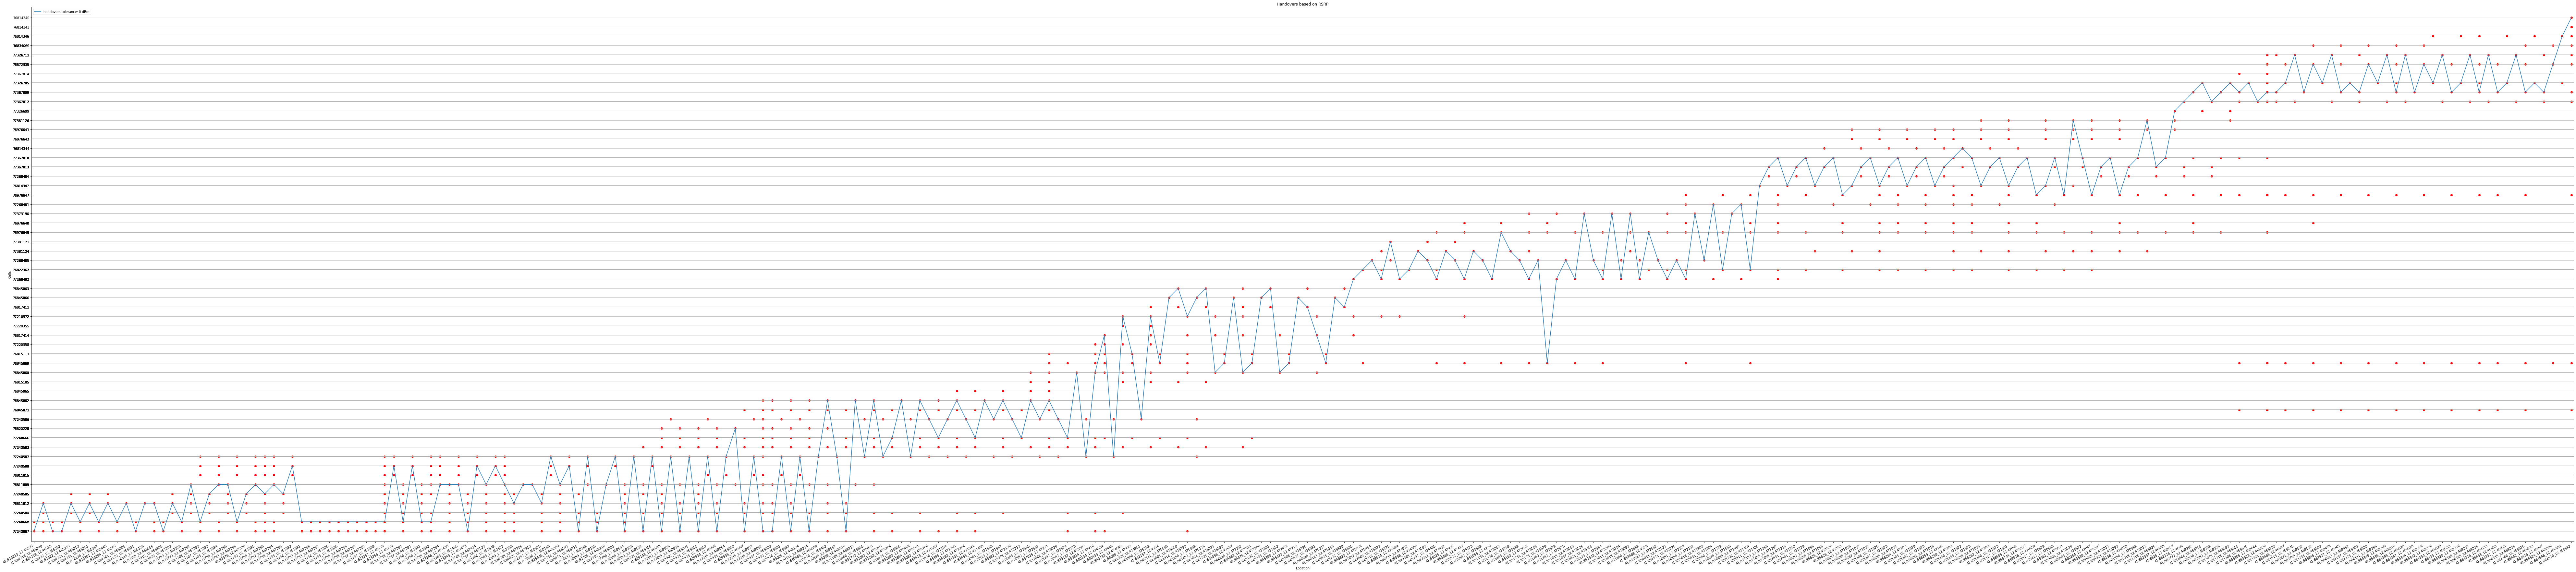

In [ ]:
### Handovers (CellIdentity) based on RSRP - RSRP Tolerance - Location Tolerance

%matplotlib inline

# load data
df = pd.read_csv('/content/drive/MyDrive/simula/driving_test.csv') #.sort_values(by=['Time', 'distance'], ascending=[True, False])
df['CellIdentity'] = df['CellIdentity'].astype('str')

# group close locations
loc_tolerance = 0 #0.05 # in km
pin = [0.0, 0.0]
location = []
for index, row in df.iterrows():
  distance = math.sqrt((row['Latitude'] - pin[0]) ** 2 + (row['Longitude'] - pin[1]) ** 2) * 111
  if distance < loc_tolerance:
    location.append(str(round(pin[0], 6)) + '_' + str(round(pin[1], 6)))
  else:
    pin = [row['Latitude'], row['Longitude']]
    location.append(str(round(row['Latitude'], 6)) + '_' + str(round(row['Longitude'], 6)))

# load toleranced location data
df['location'] = location

# get max rsrp for every location
cell_by_loc = []
prev = [0, 0, 0, 0]
res = []
[res.append(x) for x in df['location'] if x not in res] # set of location data
cnt = 0
for i in res:
  # get max rsrp on the same location
  l = []
  for j in df.index[df['location'] == i].to_list():
    l.append([j, df.iloc[j]['location'], df.iloc[j]['CellIdentity'], df.iloc[j]['RSRP']])
  min_list = max(l, key=lambda item:item[3])

  # rsrp tolerance
  tolerance = 0 #10 #50
  if (prev[2] != min_list[2]) and (prev[2] in [k[2] for k in l]) and (abs(prev[3] - min_list[3])) < tolerance:
    min_list[2] = prev[2]
    min_list[3] = prev[3]
    cnt = cnt + 1
  prev = min_list
  cell_by_loc.append(min_list)

# grid
plt.grid(axis = 'y', linestyle='-', linewidth=0.2)

# scatter detected cells
plt.scatter(df['location'], df['CellIdentity'], color='r') #, s=70, marker=1, color='red')

# plot selected cells
plt.plot([i[1] for i in cell_by_loc], [i[2] for i in cell_by_loc], label='handovers tolerance: ' + str(tolerance) + ' dBm')

# plot details
N = len(set(df['location']))
plt.gca().margins(x=0.001, y=0.02)
plt.gcf().canvas.draw()
tl = plt.gca().get_xticklabels()
maxsize = max([t.get_window_extent().width for t in tl])
m = 0.6 # inch margin
s = maxsize/plt.gcf().dpi*N+2*m
margin = m/plt.gcf().get_size_inches()[0]
len_set_x = len(set([i[1] for i in cell_by_loc]))
len_set_y = len(set([i[2] for i in cell_by_loc]))
plt.title('Handovers based on RSRP')
plt.xlabel('Location')
plt.ylabel('Cells')
plt.gcf().autofmt_xdate()
plt.gcf().set_size_inches(len_set_x * 0.4, len_set_y * 0.6)
plt.gca().set_yticks(sorted(df['CellIdentity']))
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.tight_layout()
#plt.legend(['Handovers tolerance: ' + str(tolerance) + ' dBm'])
plt.legend(loc='upper left')

# save figure#
plt.savefig('Handovers based on RSRP 16-11.png')

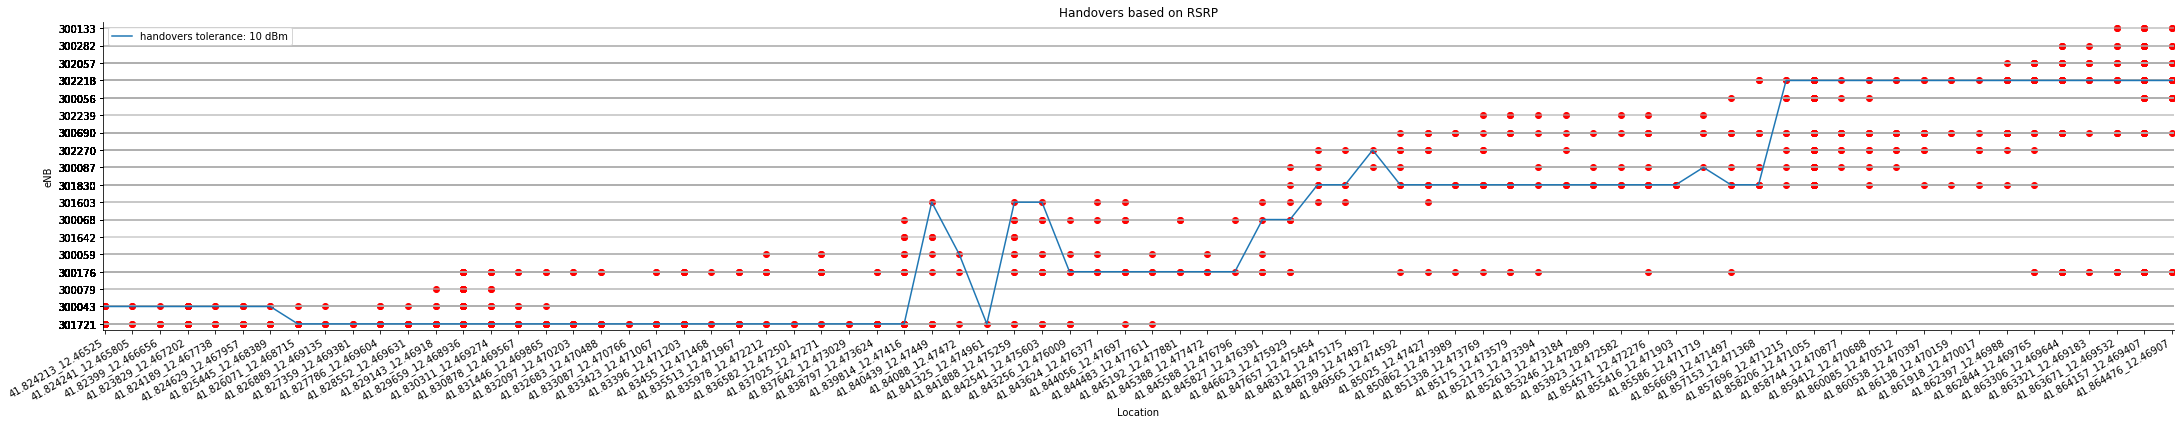

In [ ]:
### Handovers (eNB) based on RSRP - RSRP Tolerance - Location Tolerance 2

%matplotlib inline

# load data
df = pd.read_csv('/content/drive/MyDrive/simula/driving_test.csv') #.sort_values(by=['Time', 'distance'], ascending=[True, False])
df['CellIdentity'] = df['CellIdentity'].astype('str')
df['eNodeB.ID'] = df['eNodeB.ID'].astype('str')

# group close locations
loc_tolerance = 0.05 # in km
pin = [0.0, 0.0]
location = []
for index, row in df.iterrows():
  distance = math.sqrt((row['Latitude'] - pin[0]) ** 2 + (row['Longitude'] - pin[1]) ** 2) * 111
  if distance < loc_tolerance:
    location.append(str(round(pin[0], 6)) + '_' + str(round(pin[1], 6)))
  else:
    pin = [row['Latitude'], row['Longitude']]
    location.append(str(round(row['Latitude'], 6)) + '_' + str(round(row['Longitude'], 6)))

# load toleranced location data
df['location'] = location

# get max rsrp for every location
cell_by_loc = []
prev = [0, 0, 0, 0]
res = []
[res.append(x) for x in df['location'] if x not in res] # set of location data
cnt = 0
for i in res:
  # get max rsrp on the same location
  l = []
  for j in df.index[df['location'] == i].to_list():
    l.append([j, df.iloc[j]['location'], df.iloc[j]['eNodeB.ID'], df.iloc[j]['RSRP']])
  min_list = max(l, key=lambda item:item[3])

  # rsrp tolerance
  tolerance = 10 #50
  if (prev[2] != min_list[2]) and (prev[2] in [k[2] for k in l]) and (abs(prev[3] - min_list[3])) < tolerance:
    min_list[2] = prev[2]
    min_list[3] = prev[3]
    cnt = cnt + 1
  prev = min_list
  cell_by_loc.append(min_list)

# grid
plt.grid(axis = 'y', linestyle='-', linewidth=0.2)

# scatter detected cells
plt.scatter(df['location'], df['eNodeB.ID'], color='r') #, s=70, marker=1, color='red')

# plot selected cells
plt.plot([i[1] for i in cell_by_loc], [i[2] for i in cell_by_loc], label='handovers tolerance: ' + str(tolerance) + ' dBm')

# plot details
N = len(set(df['location']))
plt.gca().margins(x=0.001, y=0.02)
plt.gcf().canvas.draw()
tl = plt.gca().get_xticklabels()
maxsize = max([t.get_window_extent().width for t in tl])
m = 0.6 # inch margin
s = maxsize/plt.gcf().dpi*N+2*m
margin = m/plt.gcf().get_size_inches()[0]
len_set_x = len(set([i[1] for i in cell_by_loc]))
len_set_y = len(set([i[2] for i in cell_by_loc]))
plt.title('Handovers based on RSRP')
plt.xlabel('Location')
plt.ylabel('eNB')
plt.gcf().autofmt_xdate()
plt.gcf().set_size_inches(len_set_x * 0.4, len_set_y * 0.6)
plt.gca().set_yticks(sorted(df['eNodeB.ID']))
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.tight_layout()
#plt.legend(['Handovers tolerance: ' + str(tolerance) + ' dBm'])
plt.legend(loc='upper left')

# save figure
plt.savefig('Handovers based on RSRP 16-11.png')

**17.11.2021** 

DOSYALARI DÜZENLE !!!!!!!

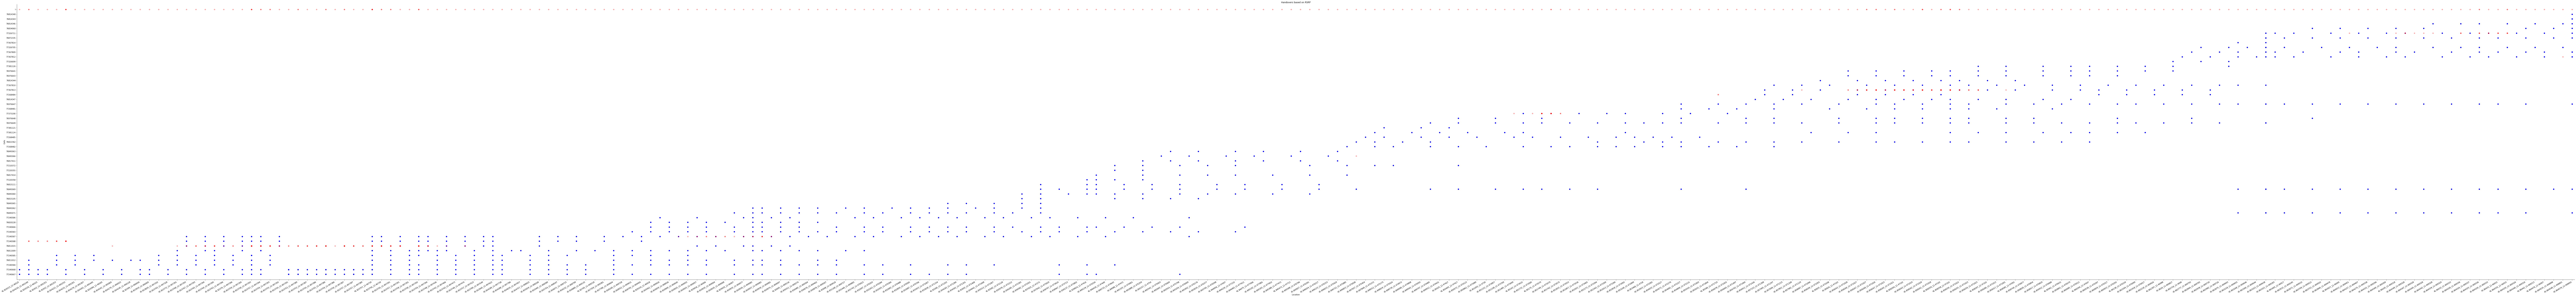

In [ ]:
### CellIdentities - max RSRP - Active Cell

%matplotlib inline

# load data
df_scanner = pd.read_csv('/content/drive/MyDrive/simula/driving_test.csv') #.sort_values(by=['Time', 'distance'], ascending=[True, False])
df_activem = pd.read_csv('/content/drive/MyDrive/simula/driving_test_active.csv') #.sort_values(by=['Time', 'distance'], ascending=[True, False])
df_syncloc = pd.read_csv('/content/drive/MyDrive/simula/driving_test_sync_loc.csv') #.sort_values(by=['Time', 'distance'], ascending=[True, False])

#df_scanner.drop_duplicates(['Latitude', 'Longitude'], inplace=True)
df_activem = df_activem[(df_activem.Latitude != '?') & (df_activem.Longitude != '?')]
df_scanner['Latitude'] = df_scanner['Latitude'].astype(float)
df_scanner['Longitude'] = df_scanner['Longitude'].astype(float)
df_activem['Latitude'] = df_activem['Latitude'].astype(float)
df_activem['Longitude'] = df_activem['Longitude'].astype(float)

# group scanner data by location
location = []
for index, row in df_scanner.iterrows():
  location.append(str(row['Latitude']) + '_' + str(row['Longitude']))
df_scanner['location'] = location

# group scanner data by location
location = []
for index, row in df_activem.iterrows():
  location.append(str(row['Latitude']) + '_' + str(row['Longitude']))
df_activem['location'] = location

# group synced data by location
location = []
for index, row in df_syncloc.iterrows():
  location.append(str(round(row['ActiveLatitude'], 6)) + '_' + str(round(row['ActiveLongitude'], 6)))
df_syncloc['location'] = location
df_syncloc.to_csv('driving sync.csv')

# max rsrp by location
rsrp_max_list = df_scanner.groupby(['Latitude', 'Longitude']).RSRP.transform(max)
df_maxrsrps = df_scanner.loc[df_scanner.RSRP.isin(rsrp_max_list)]

# cast to str
df_syncloc.CellIdentity = df_syncloc.CellIdentity.astype(str)
df_scanner.CellIdentity = df_scanner.CellIdentity.astype(str)
df_activem.CellIdentity = df_activem.CellIdentity.astype(str)
"""
# head
df_syncloc = df_syncloc.head(100)
df_scanner = df_scanner.head(100)
df_activem = df_activem.head(100)
"""
# plot
plt.scatter(df_syncloc.location, df_syncloc.CellIdentity, color='b')
plt.scatter(df_activem.loc[df_activem['location'].isin(df_syncloc.location)].location, df_activem.loc[df_activem['location'].isin(df_syncloc.location)].CellIdentity, color='r', alpha=0.3)
#plt.scatter(df_maxrsrps.location, df_maxrsrps.CellIdentity, color='g')

# plot details
N = len(set(df_syncloc.location))
plt.gca().margins(x=0.001, y=0.02)
plt.gcf().canvas.draw()
tl = plt.gca().get_xticklabels()
maxsize = max([t.get_window_extent().width for t in tl])
m = 0.6 # inch margin
s = maxsize/plt.gcf().dpi*N+2*m
margin = m/plt.gcf().get_size_inches()[0]

len_set_x = df_syncloc.location.nunique()
len_set_y = df_syncloc.CellIdentity.nunique()
plt.title('Handovers based on RSRP')
plt.xlabel('Location')
plt.ylabel('Cells')
plt.gcf().autofmt_xdate()
plt.gcf().set_size_inches(len_set_x * 0.7, len_set_y * 0.4)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.tight_layout()

# save figure
#plt.savefig('CellIdentity - max RSRP - Active Cell 17-11.png')

In [ ]:
### find closest location script

df_scanner = pd.read_csv('/content/drive/MyDrive/simula/driving_test.csv') #.sort_values(by=['Time', 'distance'], ascending=[True, False])
df_activem = pd.read_csv('/content/drive/MyDrive/simula/driving_test_active.csv') #.sort_values(by=['Time', 'distance'], ascending=[True, False])

df_activem = df_activem[(df_activem.Latitude != '?') & (df_activem.Longitude != '?')]
df_scanner['Latitude'] = df_scanner['Latitude'].astype(float).round(8)
df_scanner['Longitude'] = df_scanner['Longitude'].astype(float).round(8)
df_activem['Latitude'] = df_activem['Latitude'].astype(float).round(8)
df_activem['Longitude'] = df_activem['Longitude'].astype(float).round(8)

active_location = []
for i_sc, row_sc in df_scanner.iterrows():
  min_idx = 0
  min_distance = float('inf')
  for i_ac, row_ac in df_activem.iterrows():
    distance = math.sqrt(abs(row_sc.Latitude - row_ac.Latitude) ** 2 + abs(row_sc.Longitude - row_ac.Longitude) ** 2)
    if distance < min_distance:
      min_distance = distance
      min_idx = i_ac
  active_location.append(df_activem.loc[min_idx][['Latitude', 'Longitude']])
  if row_sc.Latitude != active_location[-1][0] or row_sc.Longitude != active_location[-1][1]:
    print(row_sc.Latitude, row_sc.Longitude)
    print(min_idx)
    print(min_distance)
    print(active_location[-1].to_list())
    #input()

df_scanner['ActiveLatitude'] = [i[0] for i in active_location]
df_scanner['ActiveLongitude'] = [i[1] for i in active_location]
df_scanner.to_csv('/content/drive/MyDrive/simula/driving_test_sync_loc')
